# Sparks Foundation Task-6

# Name:- Sai Sharanyya Chanda

# Iris Dataset using Decision Tree

In [2]:
#Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data

In [3]:
#Importing Dataset
data= pd.read_csv('iris.csv')
data.set_index('Id',drop=True,inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info() #to check null values and variables type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
data.describe() #give basis visualization only on numerical values

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data_species=data.drop(['Species'],axis=1) #Copyong all column except "Species"
data_species.head() #return first 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


### Data Visualization 

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


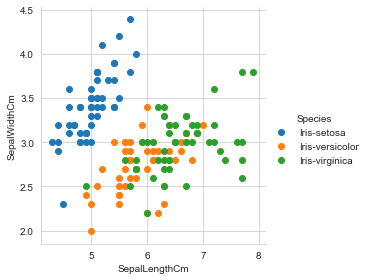

In [7]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "SepalLengthCm","SepalWidthCm") \
   .add_legend();
plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


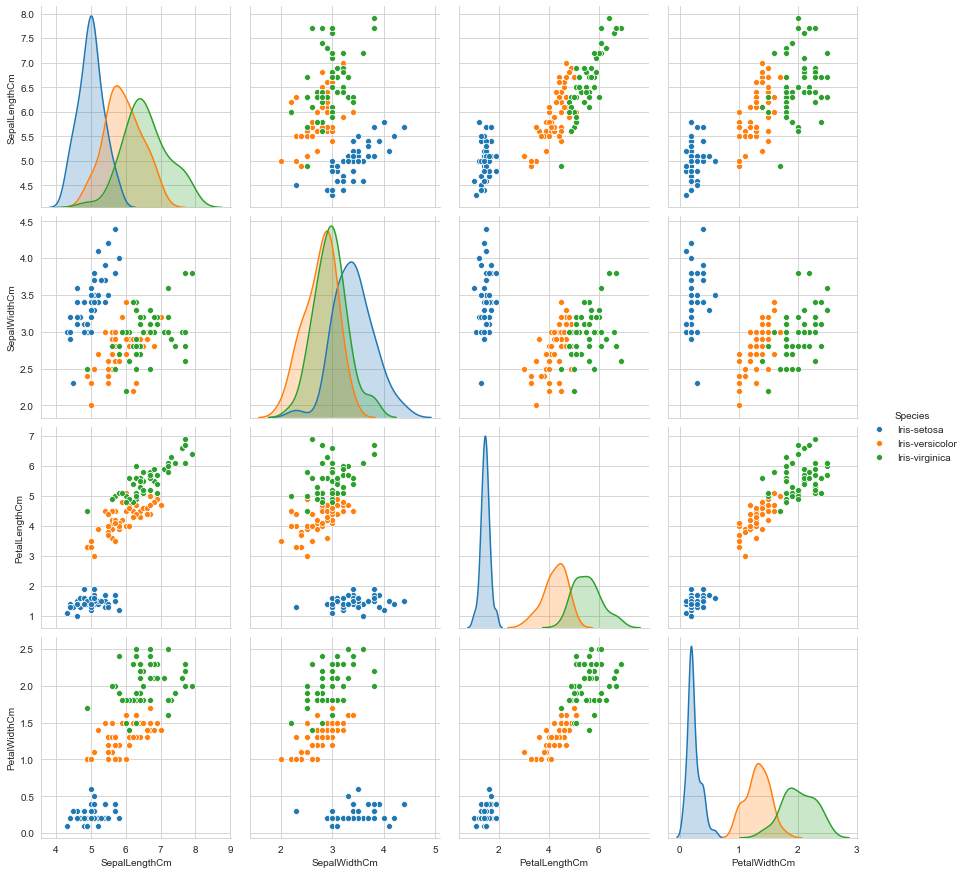

In [8]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, hue="Species", size=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

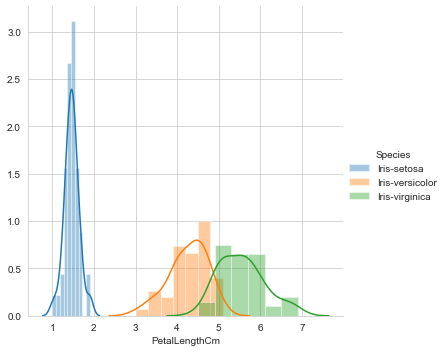

In [9]:
sns.FacetGrid(data, hue="Species", size=5) \
   .map(sns.distplot, "PetalLengthCm") \
   .add_legend();
plt.show();

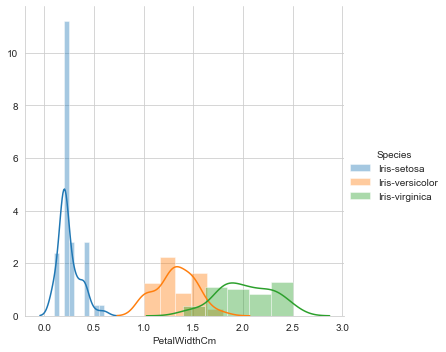

In [10]:
sns.FacetGrid(data, hue="Species", size=5) \
   .map(sns.distplot, "PetalWidthCm") \
   .add_legend();
plt.show();

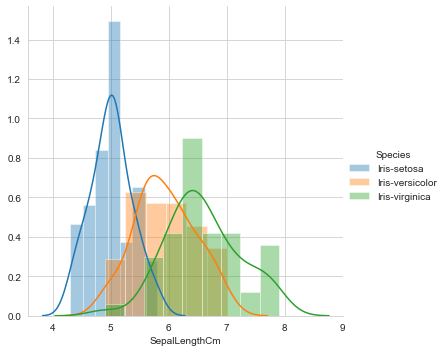

In [11]:
sns.FacetGrid(data, hue="Species", size=5) \
   .map(sns.distplot, "SepalLengthCm") \
   .add_legend();
plt.show();

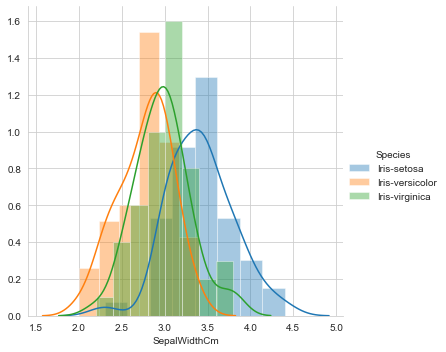

In [12]:
sns.FacetGrid(data, hue="Species", size=5) \
   .map(sns.distplot, "SepalWidthCm") \
   .add_legend();
plt.show();

In [13]:
data_species=data.drop(['Species'],axis=1) #Copyong all column except "Species"
data_species.head() #return first 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


#### Splitting Data into Train and Test

In [14]:
X=data_species
y=data['Species']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
print('Train input contains',X_train.shape, end=" Rows and columns")
print()
print('Test input contains', X_test.shape, end=" Rows and columns")
print()
print('Train Output Contains',y_train.shape, end=" Rows and columns") 
print()
print('Test Output Contains',y_test.shape, end=" Rows and columns")

Train input contains (105, 4) Rows and columns
Test input contains (45, 4) Rows and columns
Train Output Contains (105,) Rows and columns
Test Output Contains (45,) Rows and columns

### Applying Algorithm to Train Model

In [16]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score
dec=DecisionTreeClassifier()
dec.fit(X_train,y_train)
pred=dec.predict(X_test)

In [17]:
print('accuracy_score: ',accuracy_score(y_test,pred))
print('confusion_matrix:\n',confusion_matrix(y_test,pred))

accuracy_score:  0.9777777777777777
confusion_matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


### Predicting

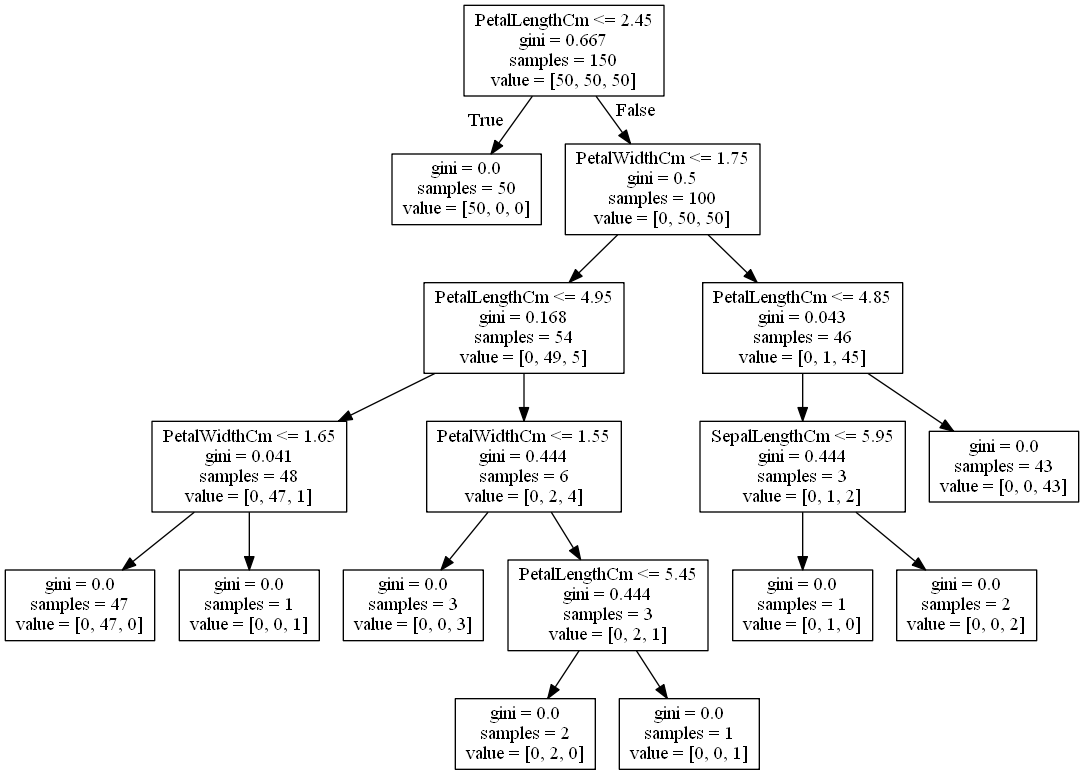

In [23]:
dot_data = StringIO()
export_graphviz(dec, out_file=dot_data, feature_names=coloum)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())